# **EDA**

In [1]:
!pip install --upgrade numpy==1.24.3
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade mplfinance

In [2]:
#Importing all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

try:
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc
except:
    !pip install mplfinance mpl_finance
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc


In [3]:
# Load dataset
df=pd.read_csv('/content/AAPL (1).csv')

In [4]:
# #First 5 rows in  dataset
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [5]:
# size of the dataset
df.shape

(2011, 7)

In [6]:
# Displaying the names of all columns in the dataset.
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB
None


In [8]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])



In [9]:
# Display basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB
None


In [10]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
# checking duplicate values
df.duplicated().sum()

0

In [12]:
# Set Date as index for time series analysis
df.set_index('Date', inplace=True)

In [13]:
#  Generating descriptive statistics for the dataset
df.describe()

Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08

# Visualization

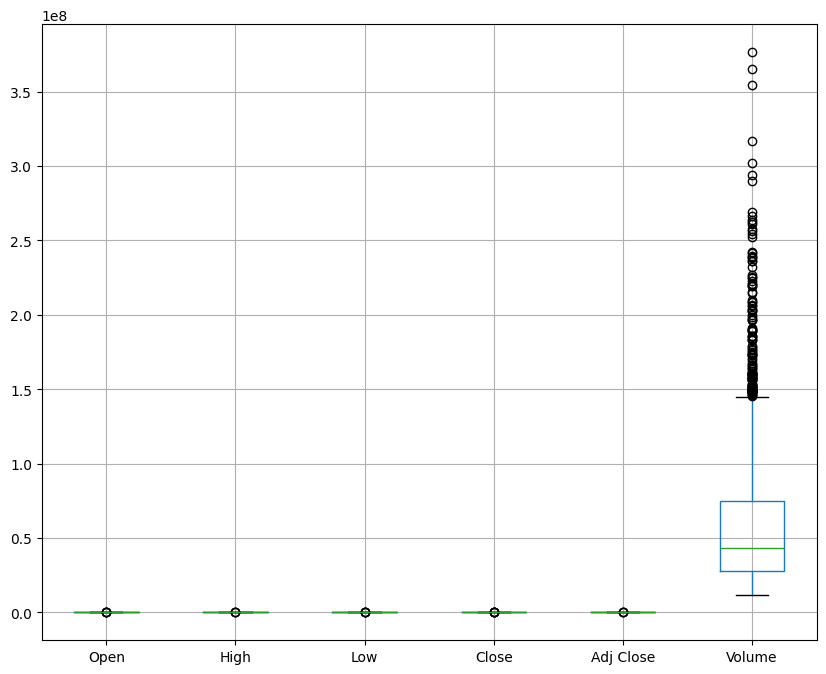

In [14]:
#Boxplot
df.boxplot(figsize=(10,8))
plt.show()

## Visualizing Price Trends Over Time

Plotting Close or Adj Close over time helps visualize overall trends and seasonality.

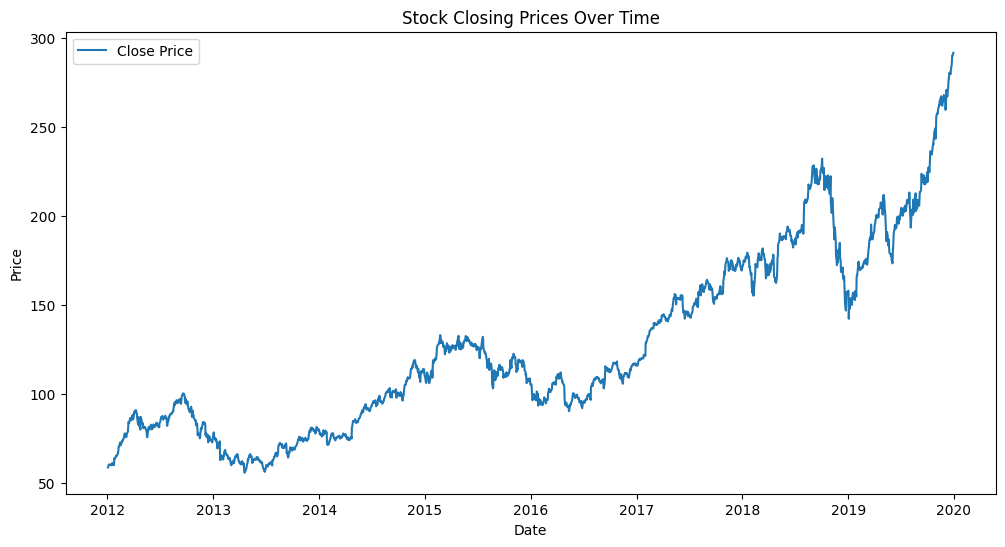

In [15]:
# Plot Close price over time(day)
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The Close price shows clear trends over time, indicating periods of growth and decline. This trend can reveal valuable insights into the stock’s long-term performance.

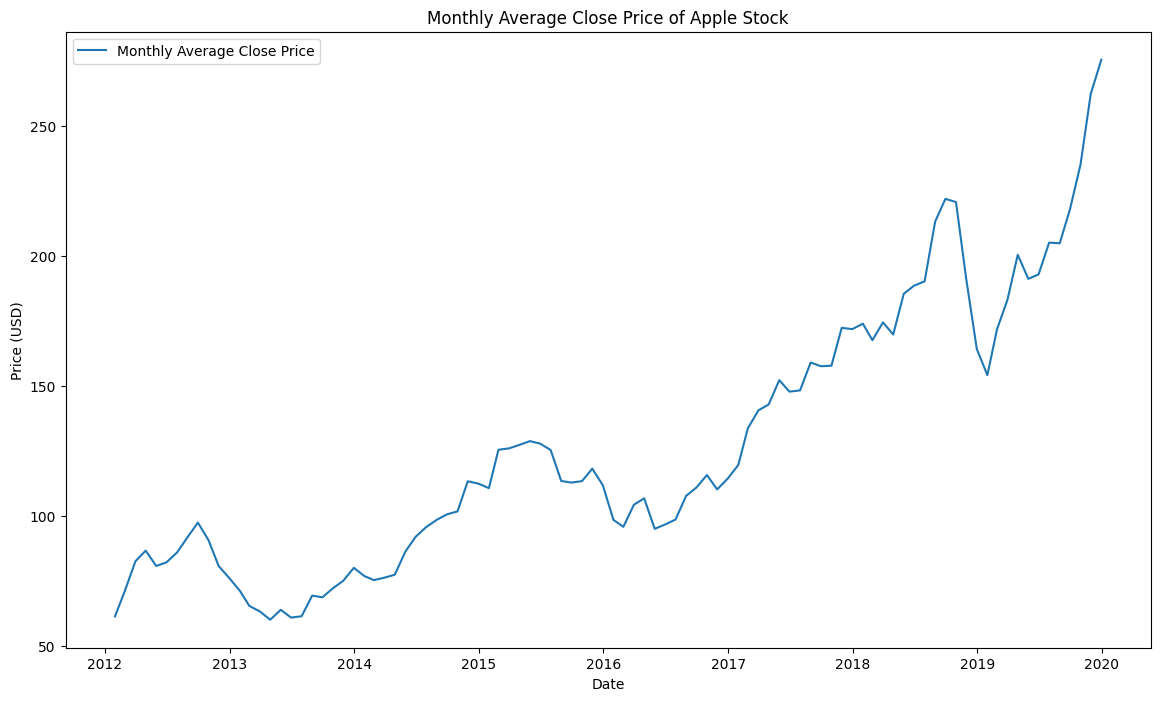

In [16]:
# Check for trends by plotting monthly average prices
df_monthly = df.resample('M').mean()
plt.figure(figsize=(14, 8))
plt.plot(df_monthly['Close'], label='Monthly Average Close Price')
plt.title("Monthly Average Close Price of Apple Stock")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

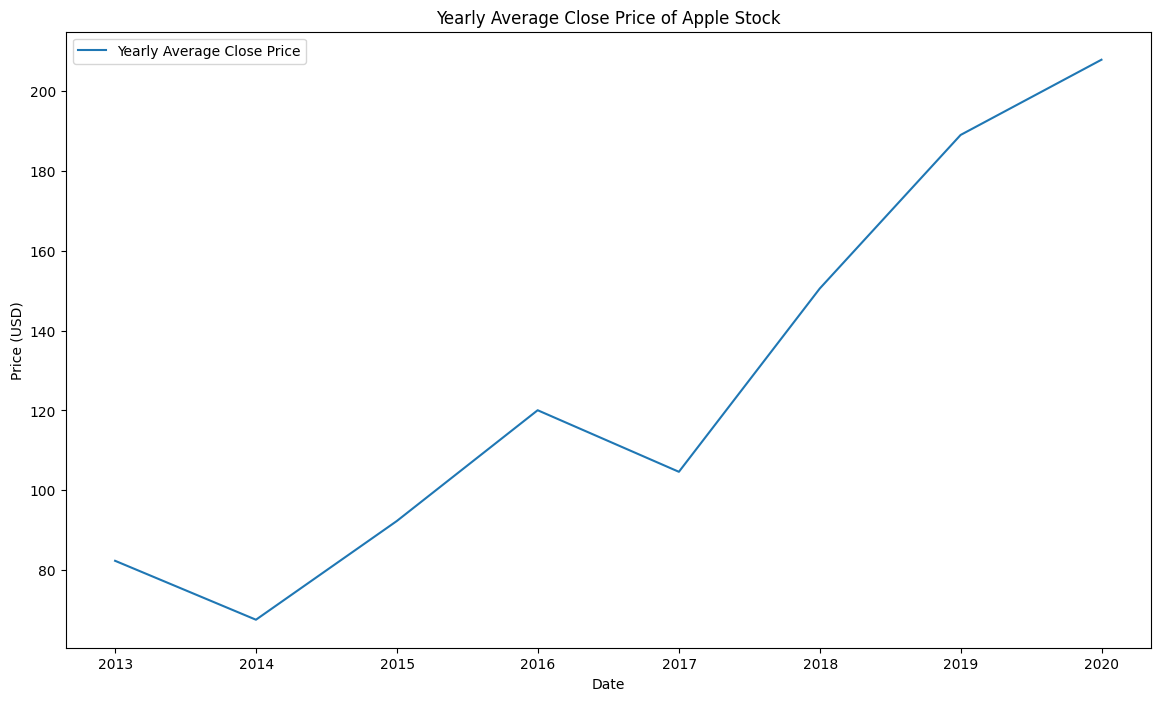

In [17]:
# Check for yearly trends
df_yearly = df.resample('Y').mean()
plt.figure(figsize=(14, 8))
plt.plot(df_yearly['Close'], label='Yearly Average Close Price')
plt.title("Yearly Average Close Price of Apple Stock")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Moving Averages

Calculate moving averages to smooth out short-term fluctuations and highlight longer-term trends.

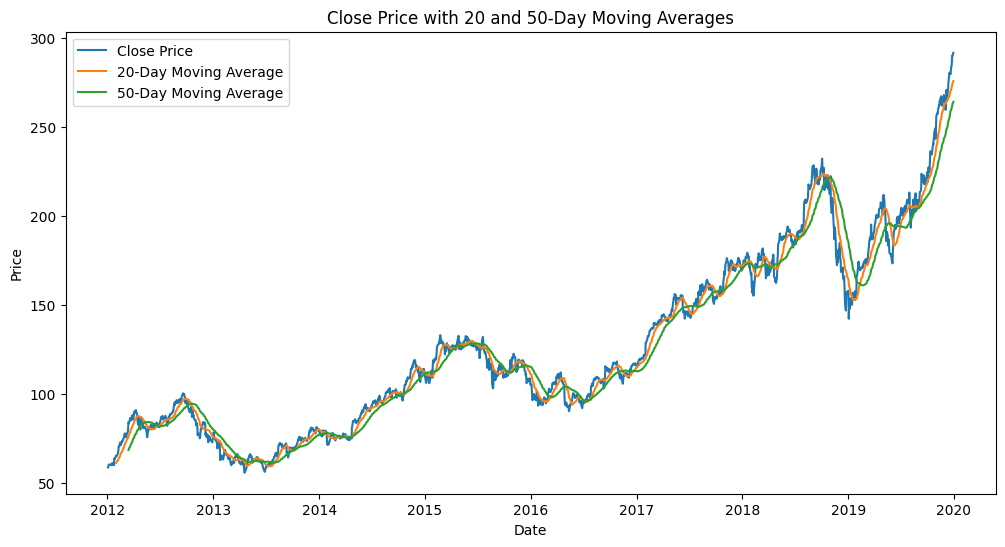

In [18]:
# Calculate 20-day and 50-day moving averages
df['20-Day MA'] = df['Close'].rolling(window=20).mean()
df['50-Day MA'] = df['Close'].rolling(window=50).mean()

# Plot Close Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['20-Day MA'], label='20-Day Moving Average')
plt.plot(df['50-Day MA'], label='50-Day Moving Average')
plt.title('Close Price with 20 and 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


 Highlighting the general direction of the stock and potential reversal points.

# Volume Analysis


High trading volume can indicate investor interest or significant price moves.

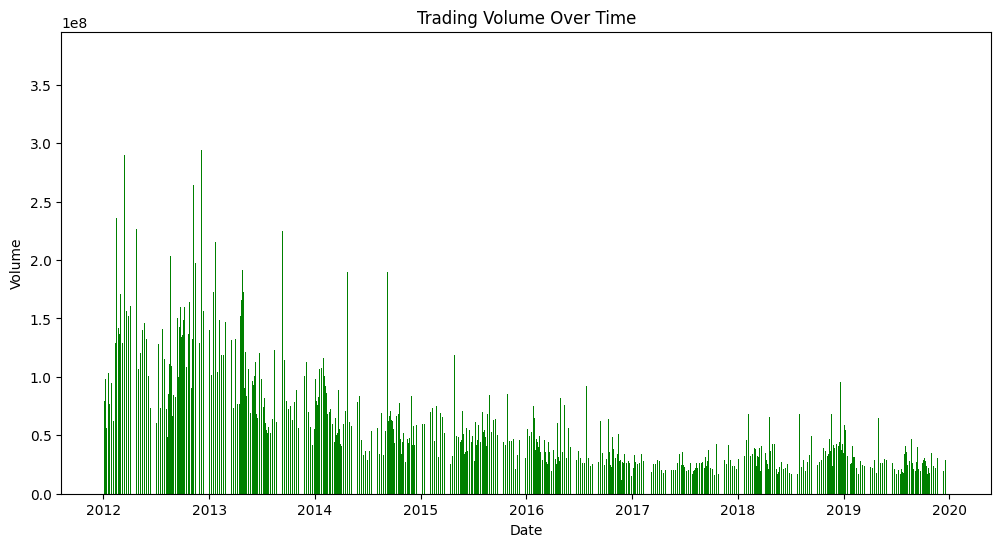

In [19]:
# Plot Volume over time
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


Significant spikes in trading volume often coincide with major price movements, suggesting increased investor activity or market reactions to news events.

# Daily Returns

Calculate daily returns to analyze daily performance and volatility.




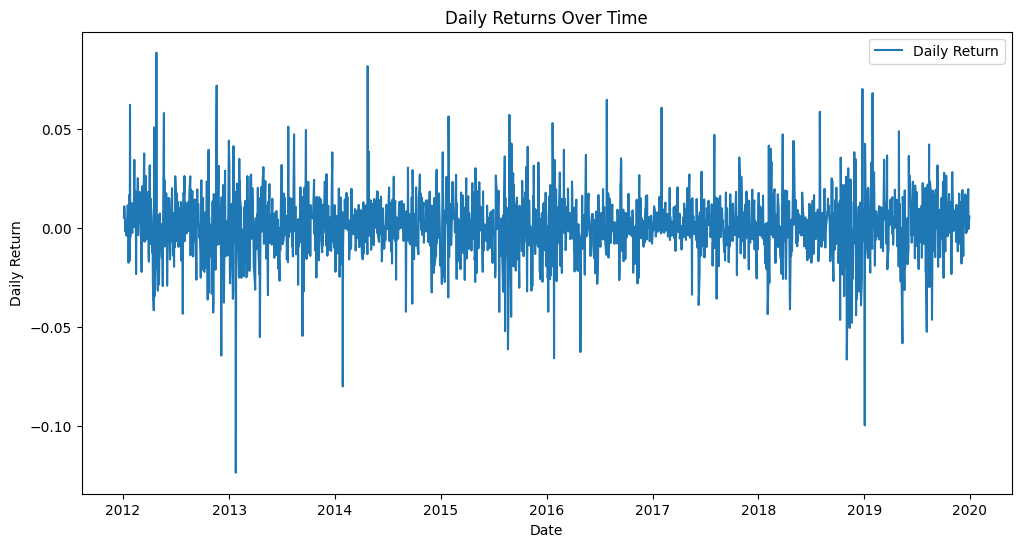

In [20]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Plot Daily Return
plt.figure(figsize=(12, 6))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


# Distribution of Daily Returns

Understanding the distribution of daily returns provides insights into volatility and risk.




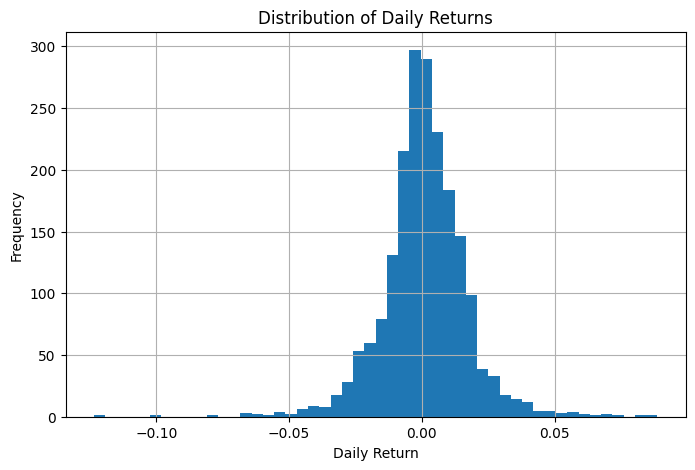

In [21]:
# Plot histogram of daily returns
plt.figure(figsize=(8, 5))
df['Daily Return'].hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


The distribution of daily returns provides a measure of the stock's volatility. A high variance in returns indicates a more volatile stock, while clustering around zero suggests stability.



# Correlations


Explore relationships between Open, High, Low, Close, and Volume.




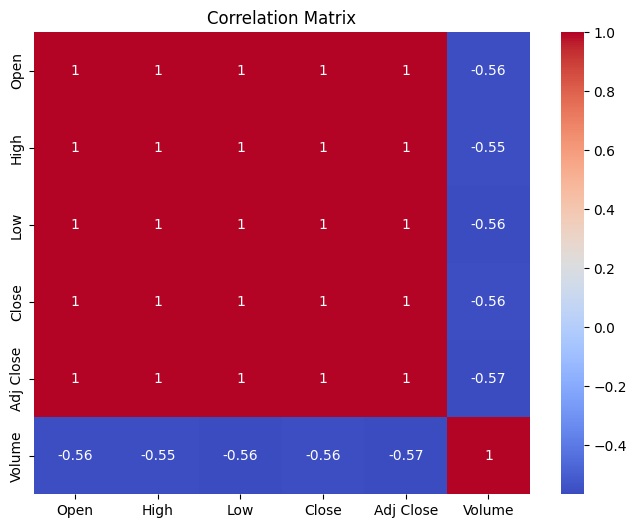

In [22]:
# Calculate and visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Trong correlations between Open, High, Low, and Close prices are expected in stock data, while Volume often has a weaker correlation with price.

# Rolling Volatility (Standard Deviation)

Calculate rolling volatility to understand periods of high or low volatility.

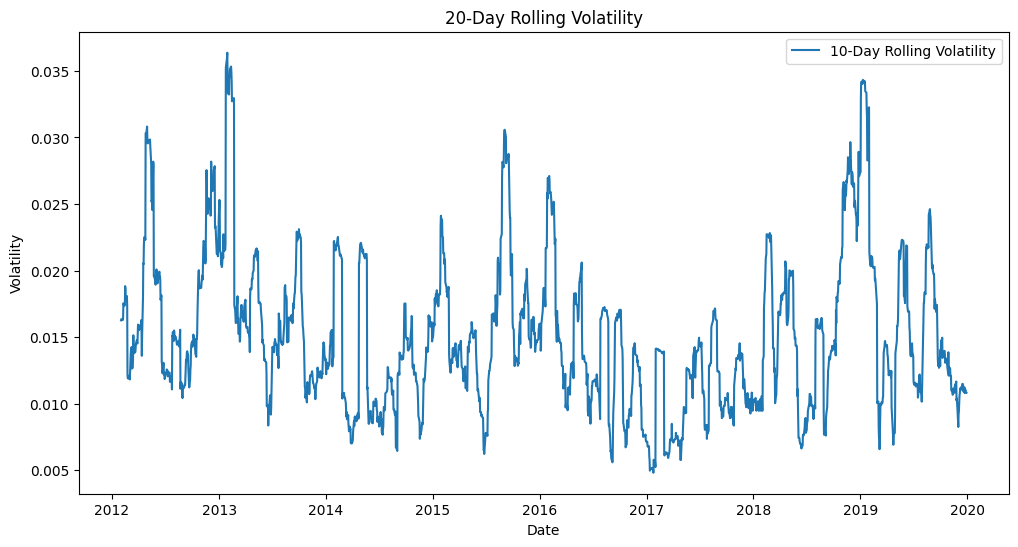

In [23]:
# Calculate 20-day rolling volatility
df['20-Day Volatility'] = df['Daily Return'].rolling(window=20).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(df['20-Day Volatility'], label='10-Day Rolling Volatility')
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


Rolling volatility analysis highlights periods of higher risk, which can be crucial for risk management and strategic investment decisions.

# CAGR Compound Annual Growth Rate (CAGR)

In [24]:
# Get the number of days in df
days = len(df)

# Calculate the CAGR
cagr = ((((df['Close'][-1]) / df['Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of Apple stock forecast since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of Apple stock forecast since IPO is  33.61 % per year


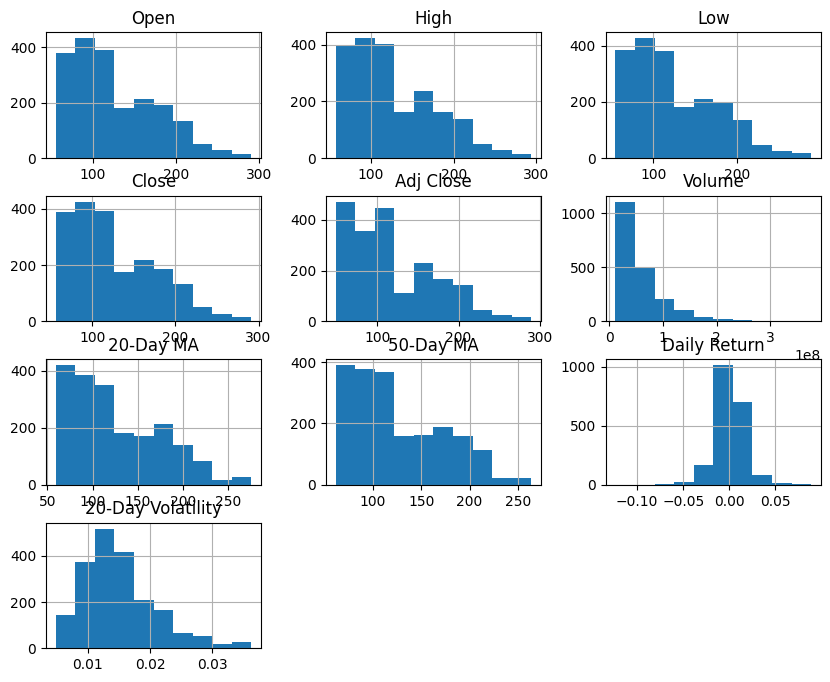

In [25]:
#Histogram
#Plotting histograms for all numerical features to visualize their distributions.
df.hist(figsize=(10,8))
plt.show()

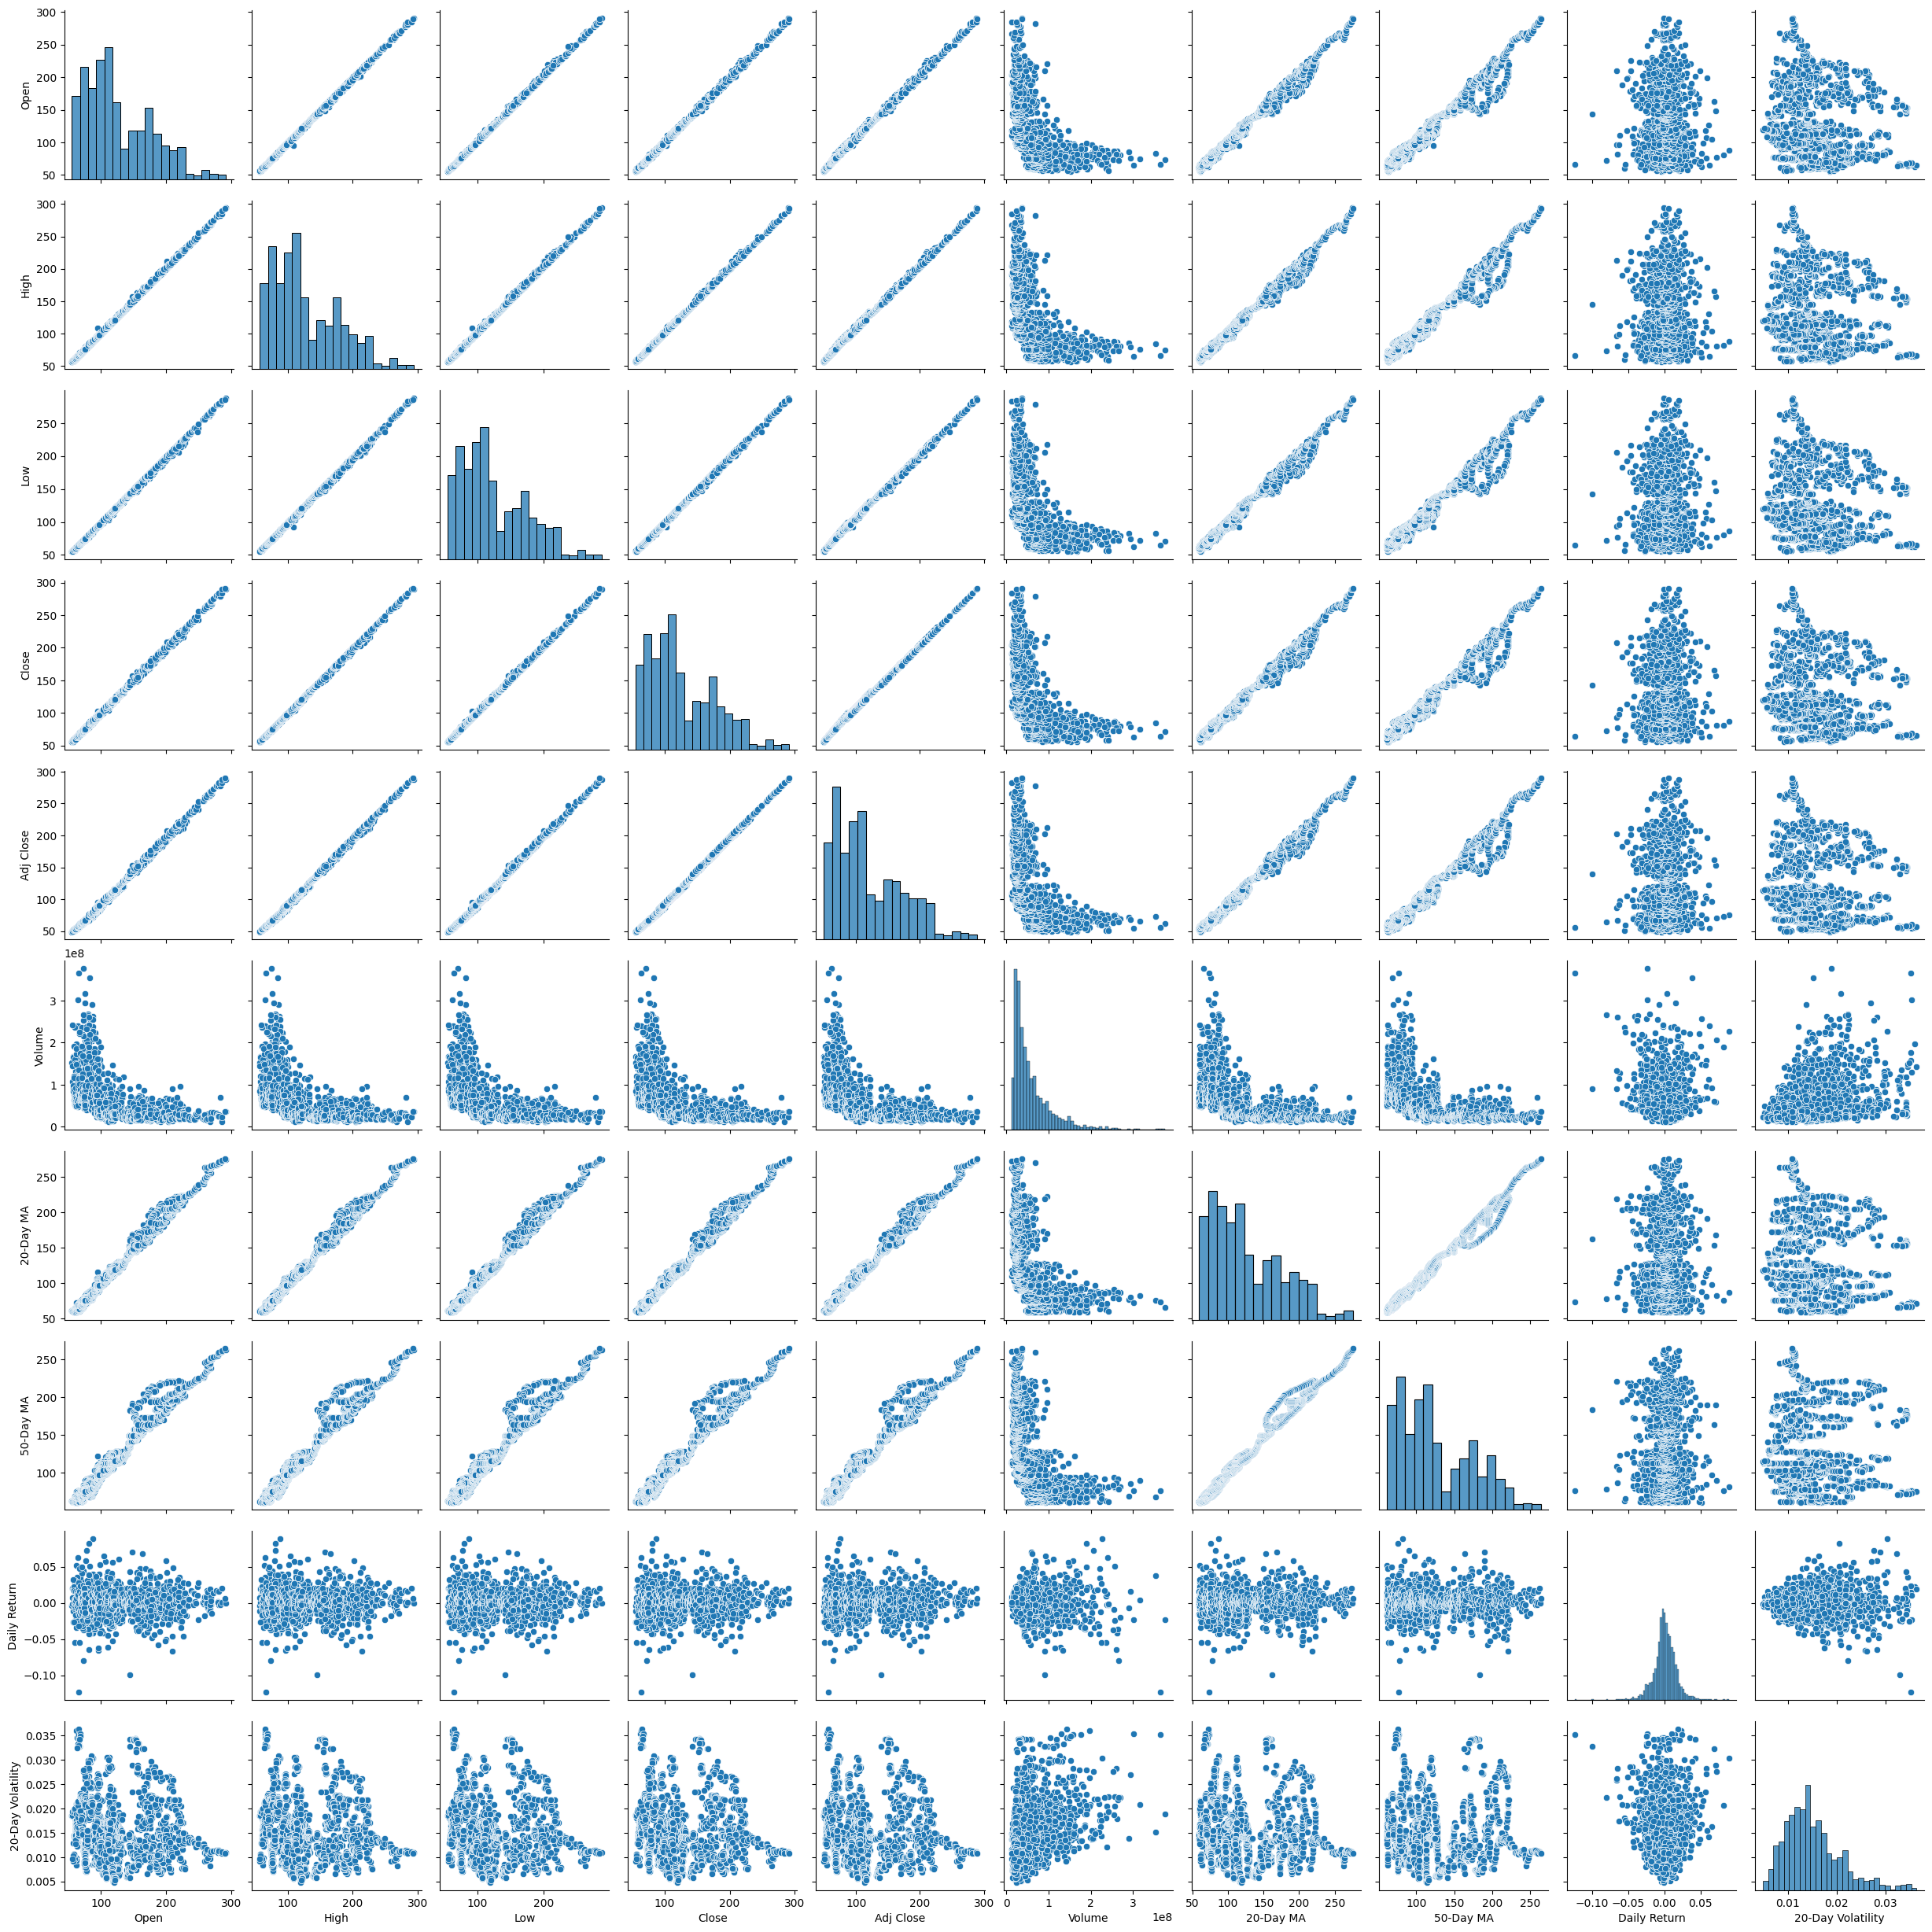

In [26]:
#pairplot
sns.pairplot(df)
plt.show()

In [27]:
# Bollinger Bands
df['BB_Mid'] = df['Close'].rolling(window=20).mean()
df['BB_Std'] = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Mid'] + (2 * df['BB_Std'])
df['BB_Lower'] = df['BB_Mid'] - (2 * df['BB_Std'])
df

# Commodity Channel Index
def calculate_cci(data, ndays=20):
    TP = (df['Close'] + df['Close'] + df['Close'])
    rolling_mean = TP.rolling(ndays).mean()
    rolling_std = TP.rolling(ndays).std()
    CCI = (TP - rolling_mean) / (0.015 * rolling_std)
    return CCI

df['CCI'] = calculate_cci(df, ndays=20)

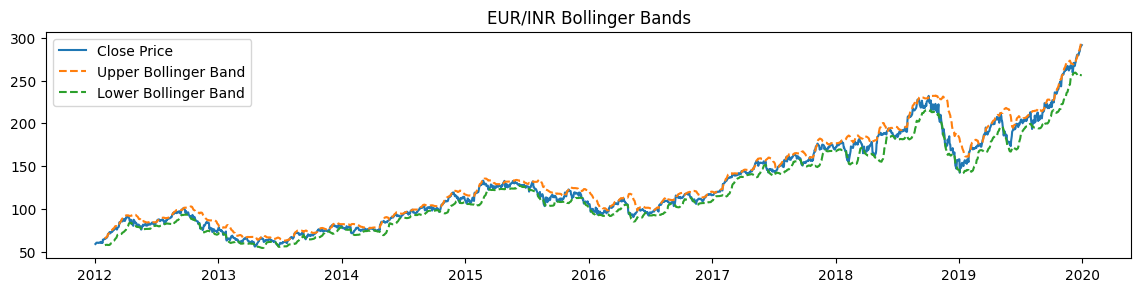

In [28]:
# Bollinger Bands plot
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['BB_Upper'], label='Upper Bollinger Band', linestyle='--')
plt.plot(df['BB_Lower'], label='Lower Bollinger Band', linestyle='--')
plt.title('EUR/INR Bollinger Bands')
plt.legend()

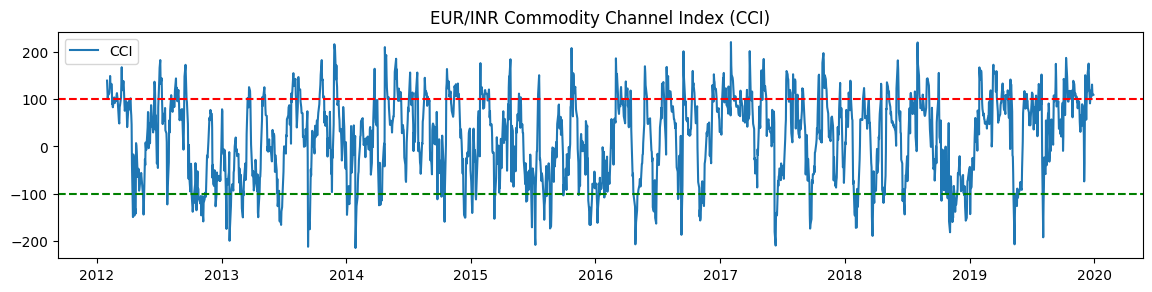

In [29]:
# CCI plot
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(df['CCI'], label='CCI')
plt.axhline(100, color='red', linestyle='--')
plt.axhline(-100, color='green', linestyle='--')
plt.title('EUR/INR Commodity Channel Index (CCI)')
plt.legend()

# Reset the index on to the Date column

In [30]:
# Access the date column by resetting the index.
data = df.reset_index()
date_column = data['Date']
date_column

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
2006   2019-12-23
2007   2019-12-24
2008   2019-12-26
2009   2019-12-27
2010   2019-12-30
Name: Date, Length: 2011, dtype: datetime64[ns]

In [31]:
data.set_index('Date', inplace=True)



# Create a column on daily change percentages for the Stock

In [32]:
data['daily_change_pct'] = data['Close'].pct_change()*100
data['returns'] = data['daily_change_pct'] / data['Close']
data.head()


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            20-Day MA  50-Day MA  Daily Return  20-Day Volatility  BB_Mid  \
Date                                                                        
2012-01-03        NaN        NaN           NaN                NaN     NaN   
2012-01-04        NaN        NaN      0.005374                NaN     NaN   
2012-01-05        NaN        NaN      0.011102                NaN     NaN   
2012-01-06        NaN        NaN      0.010454                NaN     NaN   
2012-01-09        NaN        NaN     -0.001586                NaN     NaN   

            BB_Std  BB_Upper  BB_Lower  CCI  daily_change_pct   returns  
Date                                                                     
2012-01-03     NaN       NaN       NaN  NaN               NaN       NaN  
2012-01-04     NaN       NaN       NaN  NaN          0.537415  0.009099  
2012-01-05     NaN       NaN       NaN  NaN          1.110193  0.018590  
2012-01-06     NaN       NaN       NaN  NaN          1.045380  0.017324  
2012-01-09     NaN       NaN       NaN  NaN         -0.158617 -0.002633

 Define a daily trend function for usage in aggregation

In [33]:
def daily_trend(x):
    if x > -0.5 and x <= 0.5:
        return 'No change'
    elif x > 0.5 and x <= 2:
        return 'Upto 2% Increase'
    elif x > -2 and x <= -0.5:
        return 'Upto 2% Decrease'
    elif x > 2 and x <= 5:
        return '2-5% Increase'
    elif x > -5 and x <= -2:
        return '2-5% Decrease'
    elif x > 5 and x <= 10:
        return '5-10% Increase'
    elif x > -10 and x <= -5:
        return '5-10% Decrease'
    elif x > 10:
        return '>10% Increase'
    elif x <= -10:
        return '>10% Decrease'

SMA(Statistical Moving Average) chart plotting for 5, 20, 50, 200, 500 day moving averages:

In [34]:
data['Trend']= np.zeros(data['daily_change_pct'].count()+1)
data['Trend']= data['daily_change_pct'].apply(lambda x:daily_trend(x))
data['Trend'].replace('None','No change')
data.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            20-Day MA  50-Day MA  Daily Return  20-Day Volatility  BB_Mid  \
Date                                                                        
2012-01-03        NaN        NaN           NaN                NaN     NaN   
2012-01-04        NaN        NaN      0.005374                NaN     NaN   
2012-01-05        NaN        NaN      0.011102                NaN     NaN   
2012-01-06        NaN        NaN      0.010454                NaN     NaN   
2012-01-09        NaN        NaN     -0.001586                NaN     NaN   

            BB_Std  BB_Upper  BB_Lower  CCI  daily_change_pct   returns  \
Date                                                                      
2012-01-03     NaN       NaN       NaN  NaN               NaN       NaN   
2012-01-04     NaN       NaN       NaN  NaN          0.537415  0.009099   
2012-01-05     NaN       NaN       NaN  NaN          1.110193  0.018590   
2012-01-06     NaN       NaN       NaN  NaN          1.045380  0.017324   
2012-01-09     NaN       NaN       NaN  NaN         -0.158617 -0.002633   

                       Trend  
Date                          
2012-01-03              None  
2012-01-04  Upto 2% Increase  
2012-01-05  Upto 2% Increase  
2012-01-06  Upto 2% Increase  
2012-01-09         No change

A Pie & Bar Chart of Daily Percentage change categories



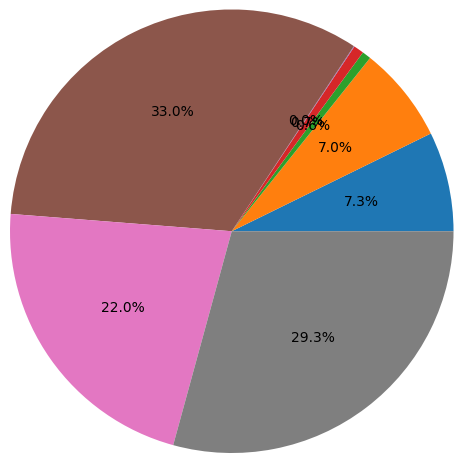

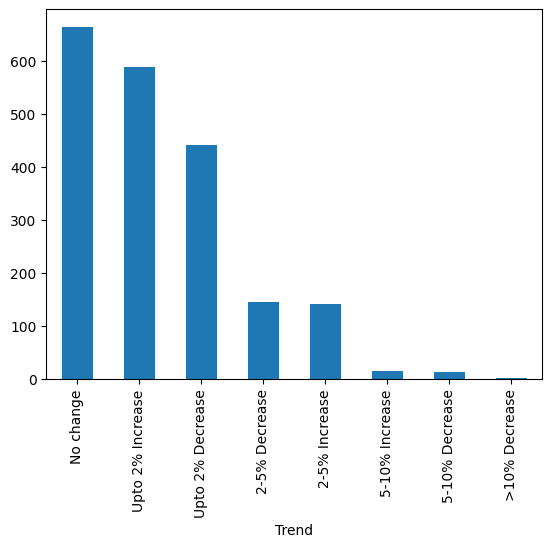

In [35]:
data_pie_data = data.groupby('Trend')
#pie_label = df_pie_data['Trend'].unique()
plt.pie(data_pie_data['Trend'].count(), #labels = pie_label,
        autopct = '%1.1f%%', radius = 1.5 )
plt.show()
ax=data_pie_data['Trend'].count().sort_values(ascending=False).plot.bar(rot=90)
plt.show()

# visualization using MPLFinance plots

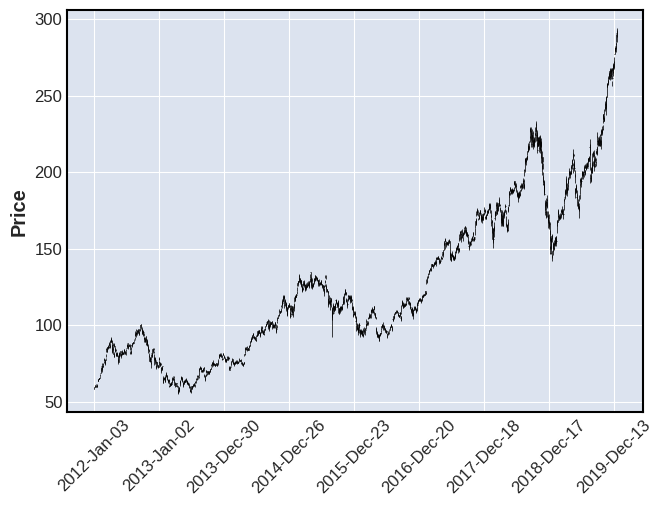

In [36]:
#General MPLFinance Plot
mpf.plot(data)

CandleStick MPLFinance plot with Moving Averages for (7, 30, 90, 180, 365) days

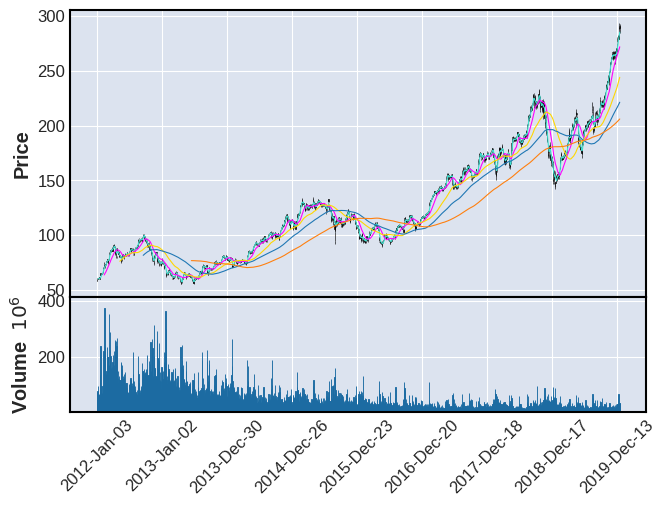

In [37]:
mpf.plot(data, type='candle', mav = (7, 30, 90, 180, 365), volume = True)

Another Candle Stick Plot with Moving Averages and show of non trading days

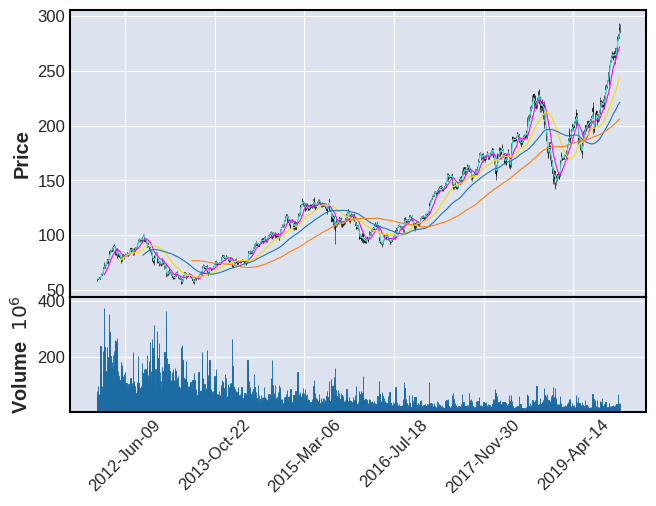

In [38]:
mpf.plot(data, type='candle', mav = (7, 30, 90, 180, 365), volume = True , show_nontrading = True)


In [39]:
data.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            20-Day MA  50-Day MA  Daily Return  20-Day Volatility  BB_Mid  \
Date                                                                        
2012-01-03        NaN        NaN           NaN                NaN     NaN   
2012-01-04        NaN        NaN      0.005374                NaN     NaN   
2012-01-05        NaN        NaN      0.011102                NaN     NaN   
2012-01-06        NaN        NaN      0.010454                NaN     NaN   
2012-01-09        NaN        NaN     -0.001586                NaN     NaN   

            BB_Std  BB_Upper  BB_Lower  CCI  daily_change_pct   returns  \
Date                                                                      
2012-01-03     NaN       NaN       NaN  NaN               NaN       NaN   
2012-01-04     NaN       NaN       NaN  NaN          0.537415  0.009099   
2012-01-05     NaN       NaN       NaN  NaN          1.110193  0.018590   
2012-01-06     NaN       NaN       NaN  NaN          1.045380  0.017324   
2012-01-09     NaN       NaN       NaN  NaN         -0.158617 -0.002633   

                       Trend  
Date                          
2012-01-03              None  
2012-01-04  Upto 2% Increase  
2012-01-05  Upto 2% Increase  
2012-01-06  Upto 2% Increase  
2012-01-09         No change

In [40]:
data.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

              Volume   20-Day MA  50-Day MA  Daily Return  20-Day Volatility  \
Date                                                                           
2019-12-23  24643000  271.181998   259.6744      0.016318           0.011232   
2019-12-24  12119700  272.076997   260.6424      0.000951           0.010795   
2019-12-26  23280300  273.357997   261.7342      0.019840           0.011062   
2019-12-27  36566500  274.455997   262.8428     -0.000379           0.010918   
2019-12-30  36028600  275.669496   263.9676      0.005935           0.010826   

                BB_Mid    BB_Std    BB_Upper    BB_Lower         CCI  \
Date                                                                   
2019-12-23  271.181998  7.221150  285.624298  256.739698  118.337590   
2019-12-24  272.076997  7.687566  287.452130  256.701865  105.737771   
2019-12-26  273.357997  8.421259  290.200516  256.515479  131.033507   
2019-12-27  274.455997  9.070523  292.597042  256.314952  112.775505   
2019-12-30  275.669496  9.660051  294.989598  256.349395  109.388610   

            daily_change_pct   returns             Trend  
Date                                                      
2019-12-23          1.631834  0.005746  Upto 2% Increase  
2019-12-24          0.095067  0.000334         No change  
2019-12-26          1.984035  0.006844  Upto 2% Increase  
2019-12-27         -0.037948 -0.000131         No change  
2019-12-30          0.593513  0.002036  Upto 2% Increase

# **MODEL BUILDING**

# 1: Import Libraries and Load Data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("/content/AAPL (1).csv")

In [42]:
# Preview the data
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


# 2: Prepare Data for Modeling

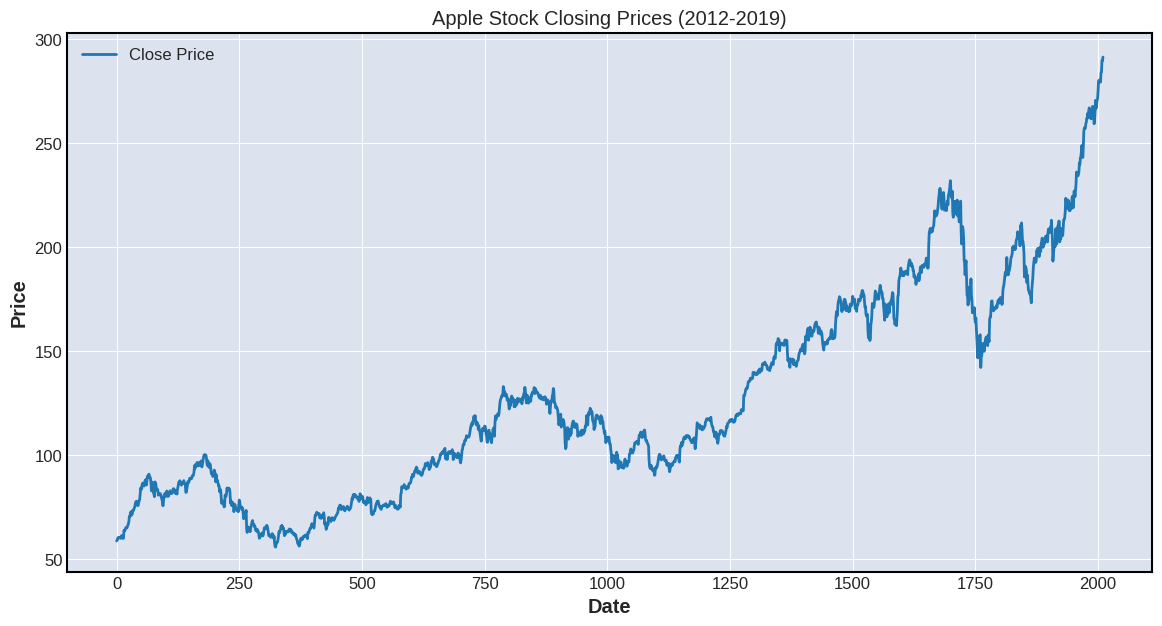

In [43]:
import matplotlib.pyplot as plt

# Plot the Close price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Apple Stock Closing Prices (2012-2019)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Split data into train and test sets:

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("/content/AAPL (1).csv")

# Convert 'Date' to datetime and set as index if 'Date' is a column
if 'Date' in df.columns:
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
else:
    # If 'Date' is already the index, check its type and convert if needed
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)


# Split the data into 80% train and 20% test
split_point = int(len(df) * 0.8)
train = df.iloc[:split_point]['Close']
test = df.iloc[split_point:]['Close']

# Print the sizes of train and test sets
print(f"Training Set Size: {len(train)}")
print(f"Testing Set Size: {len(test)}")

Training Set Size: 1608
Testing Set Size: 403


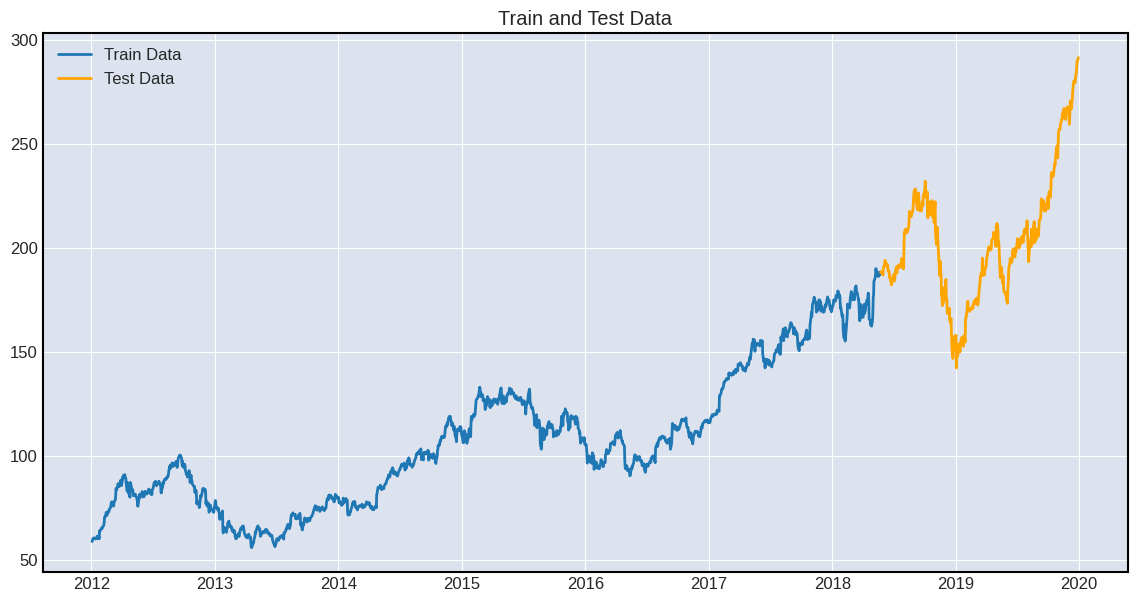

In [45]:
# Plot train and test data
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data', color='orange')
plt.title("Train and Test Data")
plt.legend()
plt.show()

Perform stationarity test (ADF Test):

In [46]:
from statsmodels.tsa.stattools import adfuller

# ADF test
result = adfuller(train)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.09475682688784128
p-value: 0.9657012897826207


# 4: Build and Tune SARIMAX Model

Find the best parameters using grid search:


In [47]:
!pip install pmdarima

In [48]:
from pmdarima import auto_arima

# Find best SARIMA parameters
auto_arima_model = auto_arima(train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6164.339, Time=25.95 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6171.048, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6170.597, Time=2.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6170.484, Time=4.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6172.891, Time=0.21 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=6162.410, Time=23.47 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=6163.594, Time=9.02 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=6164.307, Time=19.80 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=6162.364, Time=8.36 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=6164.321, Time=19.54 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=6166.307, Time=21.67 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=6173.375, Time=2.61 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=6173.283, Time=2.73 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=6163.818, Time=12.35 sec
 ARIMA(2,1,3)

# **Train the SARIMAX model**:



In [49]:
# Extract optimal order and seasonal order
order = auto_arima_model.order
seasonal_order = auto_arima_model.seasonal_order

# Fit SARIMAX model
sarimax_model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarimax_result = sarimax_model.fit()

# Model summary
print(sarimax_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 1608
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood               -3055.644
Date:                             Tue, 17 Dec 2024   AIC                           6123.289
Time:                                     21:42:31   BIC                           6155.529
Sample:                                          0   HQIC                          6135.263
                                            - 1608                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1321      0.082    -13.832      0.000      -1.293      -0.972
ar.L2         -0.7693      

# 5: Forecast and Evaluate

Predict on the test set:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


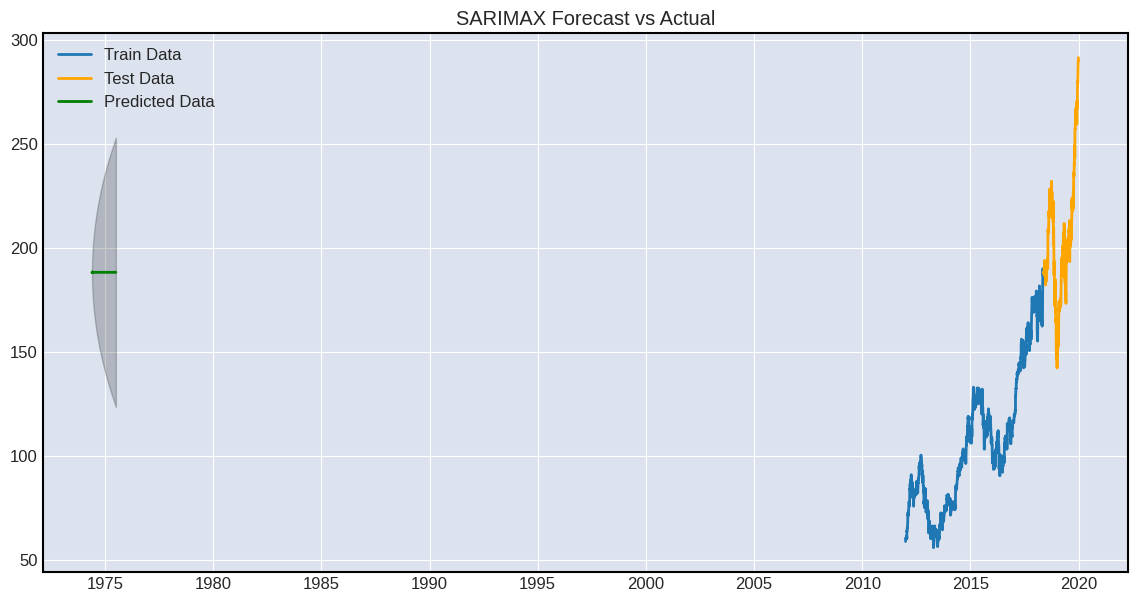

In [50]:
# Forecast for the test period
forecast = sarimax_result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(forecast.predicted_mean, label='Predicted Data', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title("SARIMAX Forecast vs Actual")
plt.legend()
plt.show()

Evaluate model performance:

In [51]:
# Calculate evaluation metrics
mae = mean_absolute_error(test, forecast.predicted_mean)
rmse = np.sqrt(mean_squared_error(test, forecast.predicted_mean))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 25.458707575657037
Root Mean Squared Error: 34.116261215584885


In [52]:
naive_forecast = test.shift(1).dropna()
mse_naive = mean_squared_error(test[1:], naive_forecast)
print(f"Baseline MSE (Naive): {mse_naive}")


Baseline MSE (Naive): 11.796772935967104


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6164.339, Time=28.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6171.048, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6170.597, Time=3.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6170.484, Time=2.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6172.891, Time=0.23 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=6162.410, Time=16.85 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=6163.594, Time=7.98 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=6164.307, Time=17.66 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=6162.364, Time=9.29 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=6164.321, Time=19.30 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=6166.307, Time=21.34 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=6173.375, Time=2.53 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=6173.283, Time=2.61 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=6163.818, Time=12.07 sec
 ARIMA(2,1,3)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 1608
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood               -3055.644
Date:                             Tue, 17 Dec 2024   AIC                           6123.289
Time:                                     21:45:38   BIC                           6155.529
Sample:                                          0   HQIC                          6135.263
                                            - 1608                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1321      0.082    -13.832      0.000      -1.293      -0.972
ar.L2         -0.7693      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


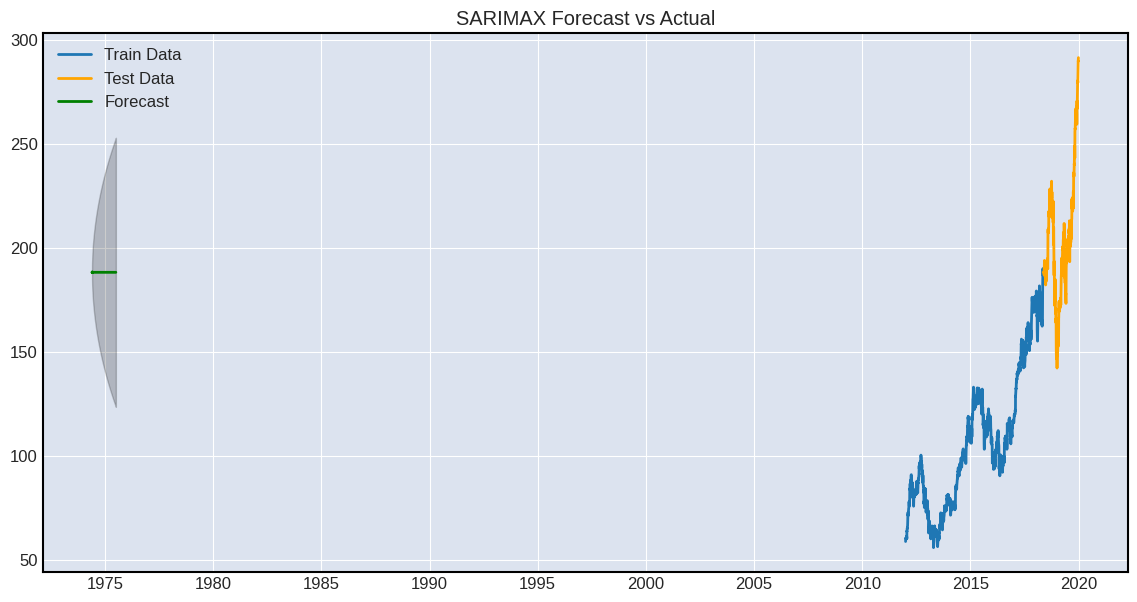

Mean Absolute Error: 25.458707575657037
Root Mean Squared Error: 34.116261215584885
Accuracy: 87.55%


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Check stationarity and apply differencing if necessary
result = adfuller(train)
if result[1] > 0.05:
    train_diff = train.diff().dropna()
else:
    train_diff = train

# Step 2: Auto-tune parameters using grid search (optional) or manually set parameters
from pmdarima import auto_arima

auto_arima_model = auto_arima(
    train,
    seasonal=True,
    m=12,
    trace=True,
    suppress_warnings=True,
    stepwise=True,
    error_action='ignore'
)
order = auto_arima_model.order
seasonal_order = auto_arima_model.seasonal_order
print(f"Optimal Order: {order}")
print(f"Seasonal Order: {seasonal_order}")

# Step 3: Train the SARIMAX model
sarimax_model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())

# Step 4: Forecast for the test period
forecast = sarimax_result.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 5: Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data", color="orange")
plt.plot(forecast_mean, label="Forecast", color="green")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="k", alpha=0.2)
plt.title("SARIMAX Forecast vs Actual")
plt.legend()
plt.show()

# Step 6: Evaluate the model
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))

# Calculate accuracy percentage
mean_actual = test.mean()
accuracy = 100 - (mae / mean_actual) * 100

# Display metrics
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Accuracy: {accuracy:.2f}%")

# **XGBoost**

In [54]:
pip install --upgrade xgboost


[0]	train-rmse:32.34565
[50]	train-rmse:19.76853
[100]	train-rmse:12.13613
[150]	train-rmse:7.51312
[200]	train-rmse:4.73494
[250]	train-rmse:3.09107
[300]	train-rmse:2.14352
[350]	train-rmse:1.61698
[400]	train-rmse:1.33040
[450]	train-rmse:1.17115
[500]	train-rmse:1.07592
[550]	train-rmse:1.01653
[600]	train-rmse:0.97500
[650]	train-rmse:0.94658
[700]	train-rmse:0.92455
[750]	train-rmse:0.90410
[800]	train-rmse:0.88188
[850]	train-rmse:0.86430
[900]	train-rmse:0.84785
[950]	train-rmse:0.83296
[999]	train-rmse:0.81946
Mean Absolute Error (MAE): 22.155094486929084
Root Mean Squared Error (RMSE): 32.826181250998644
Mean Absolute Percentage Error (MAPE): 9.58%
Accuracy: 89.17%


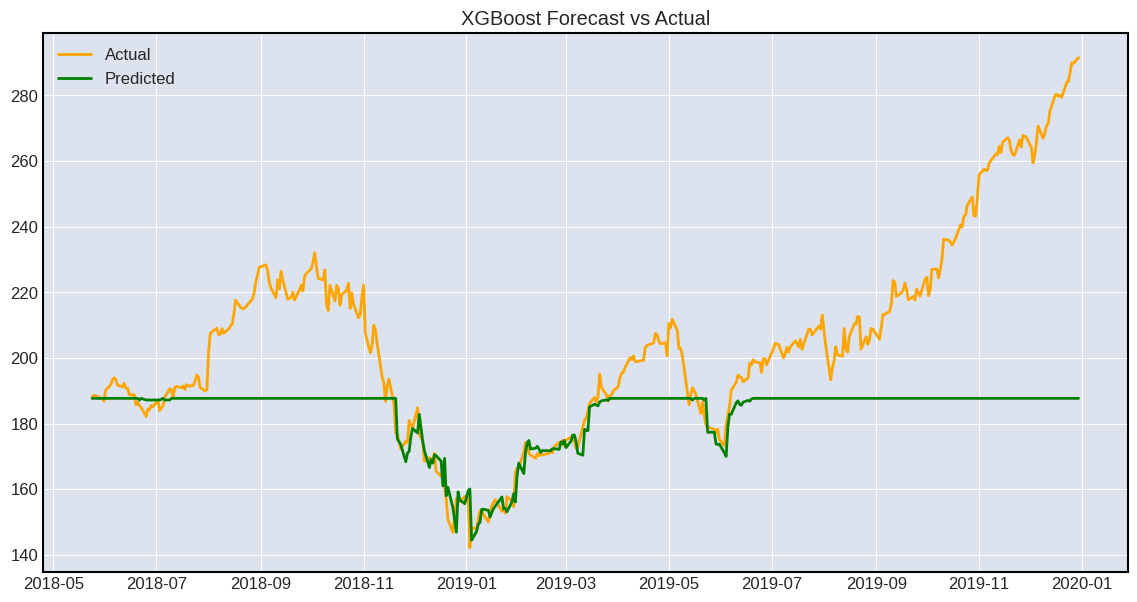

In [55]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Prepare the data
def create_lag_features(data, lags):
    """
    Creates lagged features for a univariate time series.
    :param data: Pandas Series or DataFrame of the time series.
    :param lags: Number of lag features to create.
    :return: DataFrame with lag features.
    """
    lagged_data = pd.DataFrame({'y': data})
    for lag in range(1, lags + 1):
        lagged_data[f'lag_{lag}'] = lagged_data['y'].shift(lag)
    return lagged_data.dropna()

# Define the number of lags
lags = 12  # Adjust based on seasonality
train_lags = create_lag_features(train, lags)

# Separate features (X) and target (y)
X_train = train_lags.drop(columns=['y'])
y_train = train_lags['y']

# Prepare test data
test_lags = create_lag_features(pd.concat([train, test]), lags).iloc[len(train) - lags:]
X_test = test_lags.drop(columns=['y'])
y_test = test_lags['y']

# Convert datasets to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Step 2: Define XGBoost Parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "learning_rate": 0.01,           # Learning rate (adjust for better performance)
    "max_depth": 6,                  # Depth of each tree
    "eval_metric": "rmse",           # Evaluation metric
    "seed": 42                       # Random seed for reproducibility
}

# Step 3: Train the model with early stopping
evals = [(dtrain, "train")]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,  # Stop if no improvement for 50 rounds
    verbose_eval=50            # Print every 50 iterations
)

# Step 4: Make predictions
y_pred = model.predict(dtest)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, 1e-8))) * 100  # Handle division by zero
accuracy = 100 - (mae / y_test.mean()) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# Step 6: Visualize predictions
plt.figure(figsize=(14, 7))
plt.plot(test.index, y_test, label="Actual", color="orange")
plt.plot(test.index, y_pred, label="Predicted", color="green")
plt.title("XGBoost Forecast vs Actual")
plt.legend()
plt.show()

Checking for missing values...
X_train missing values: 0
y_train missing values: 0
X_test missing values: 0
y_test missing values: 0
Starting GridSearchCV...
GridSearchCV completed.

Best Model Evaluation Metrics:
Mean Absolute Error (MAE): 22.41
Root Mean Squared Error (RMSE): 33.13
Mean Absolute Percentage Error (MAPE): 9.68%
R-squared: -0.22
Explained Variance Score: 0.30
Accuracy (MAPE-based): 90.32%


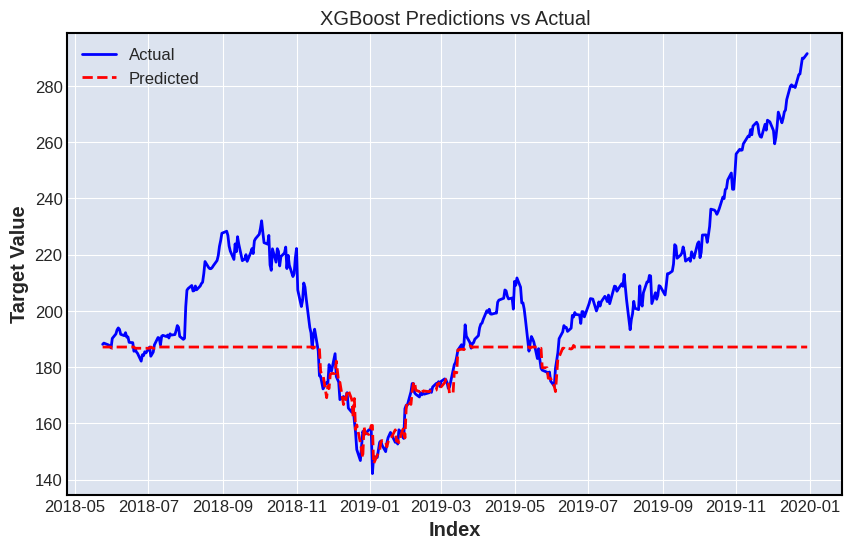

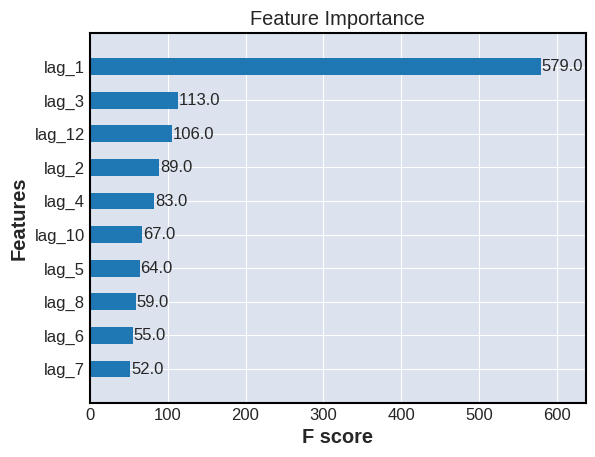

In [56]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Check for missing values
print("Checking for missing values...")
print(f"X_train missing values: {X_train.isnull().sum().sum()}")
print(f"y_train missing values: {y_train.isnull().sum()}")
print(f"X_test missing values: {X_test.isnull().sum().sum()}")
print(f"y_test missing values: {y_test.isnull().sum()}")

# Fill missing values if necessary
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Step 2: Define XGBoost model and hyperparameter grid
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
}

# Step 3: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

# Step 4: Get the best model and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, 1e-8))) * 100
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
accuracy_mape = 100 - mape

print("\nBest Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")
print(f"Accuracy (MAPE-based): {accuracy_mape:.2f}%")

# Step 5: Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('XGBoost Predictions vs Actual')
plt.legend()
plt.show()

# Step 6: Feature importance plot
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10, title="Feature Importance", height=0.5)
plt.show()


# **CatBoost Regressor**

In [57]:
!pip install catboost # Install the catboost library


CatBoost Model Evaluation Metrics:
Mean Absolute Error (MAE): 22.01
Root Mean Squared Error (RMSE): 32.71
Mean Absolute Percentage Error (MAPE): 9.50%
R-squared: -0.19
Explained Variance Score: 0.30
Accuracy (MAPE-based): 90.50%


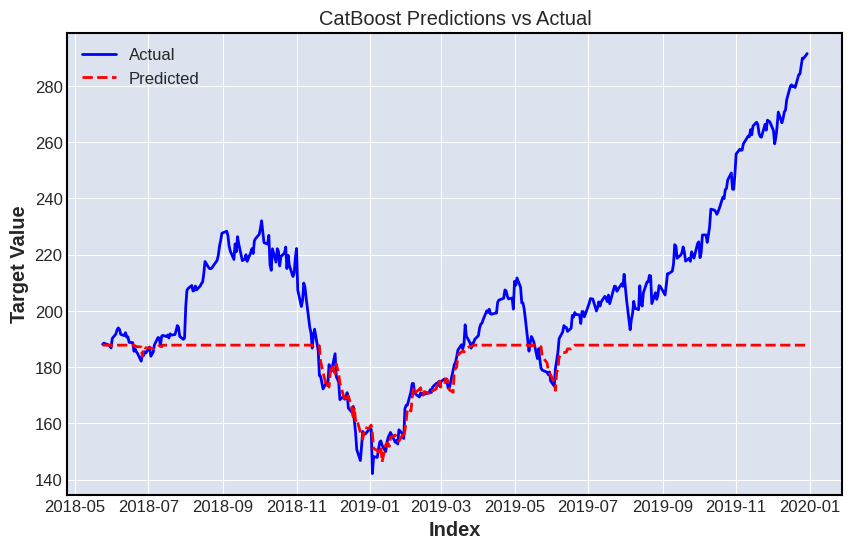

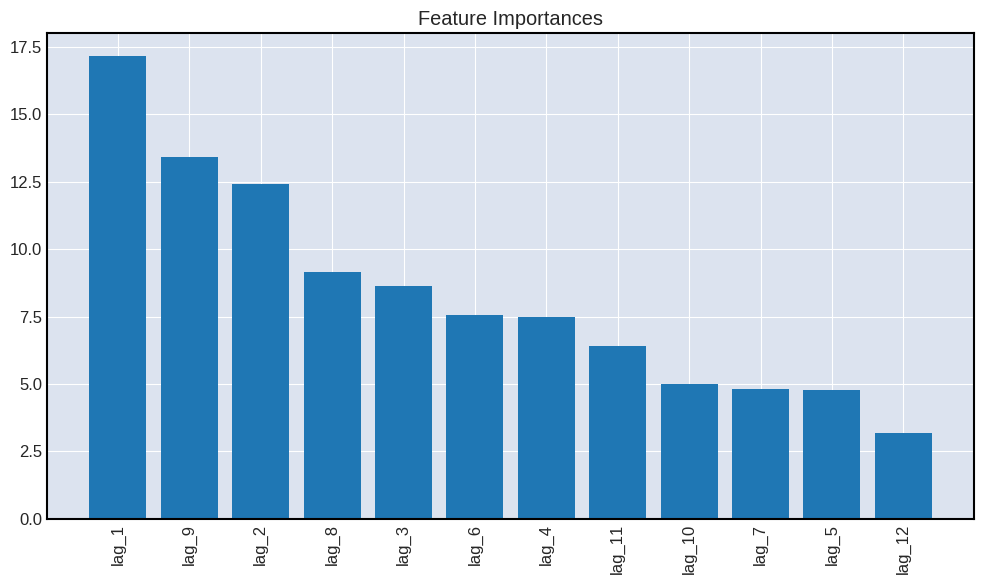

In [58]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt

# Split your dataset into training and testing sets
# Ensure your data is clean: Fill missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(
    iterations=1000,
    depth=8,
    learning_rate=0.05,
    loss_function='RMSE',
    random_seed=42,
    silent=True
)

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, 1e-8))) * 100
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
accuracy_mape = 100 - mape

print("\nCatBoost Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")
print(f"Accuracy (MAPE-based): {accuracy_mape:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('CatBoost Predictions vs Actual')
plt.legend()
plt.show()

# Feature importance plot
feature_importances = catboost_model.get_feature_importance()
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [X_train.columns[i] for i in sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


# **LSTM Implementation**

In [59]:
pip install tensorflow

  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
langchain 0.3.11 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.0.2 which

In [60]:
pip install --upgrade --force-reinstall tensorflow

  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached protobuf-5.29.1-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached termcolor-2.5.0-py3-none-

In [61]:
pip list | grep tensorflow

tensorflow                         2.18.0
tensorflow-datasets                4.9.7
tensorflow-hub                     0.16.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.13.1
tensorflow-probability             0.24.0


In [62]:
pip install --upgrade pip


Epoch 1/20
50/50 - 25s - 491ms/step - loss: 0.0065 - val_loss: 0.0042
Epoch 2/20
50/50 - 3s - 53ms/step - loss: 9.7998e-04 - val_loss: 0.0016
Epoch 3/20
50/50 - 2s - 33ms/step - loss: 8.8864e-04 - val_loss: 0.0011
Epoch 4/20
50/50 - 2s - 34ms/step - loss: 8.1808e-04 - val_loss: 9.4873e-04
Epoch 5/20
50/50 - 1s - 17ms/step - loss: 7.8885e-04 - val_loss: 9.2494e-04
Epoch 6/20
50/50 - 1s - 16ms/step - loss: 7.0515e-04 - val_loss: 9.0703e-04
Epoch 7/20
50/50 - 1s - 16ms/step - loss: 6.7228e-04 - val_loss: 0.0010
Epoch 8/20
50/50 - 2s - 35ms/step - loss: 6.7982e-04 - val_loss: 0.0012
Epoch 9/20
50/50 - 1s - 26ms/step - loss: 7.3848e-04 - val_loss: 0.0018
Epoch 10/20
50/50 - 2s - 38ms/step - loss: 6.3668e-04 - val_loss: 0.0011
Epoch 11/20
50/50 - 2s - 47ms/step - loss: 6.3229e-04 - val_loss: 8.6719e-04
Epoch 12/20
50/50 - 2s - 33ms/step - loss: 6.0931e-04 - val_loss: 0.0012
Epoch 13/20
50/50 - 2s - 50ms/step - loss: 5.3121e-04 - val_loss: 8.7701e-04
Epoch 14/20
50/50 - 1s - 29ms/step - loss:

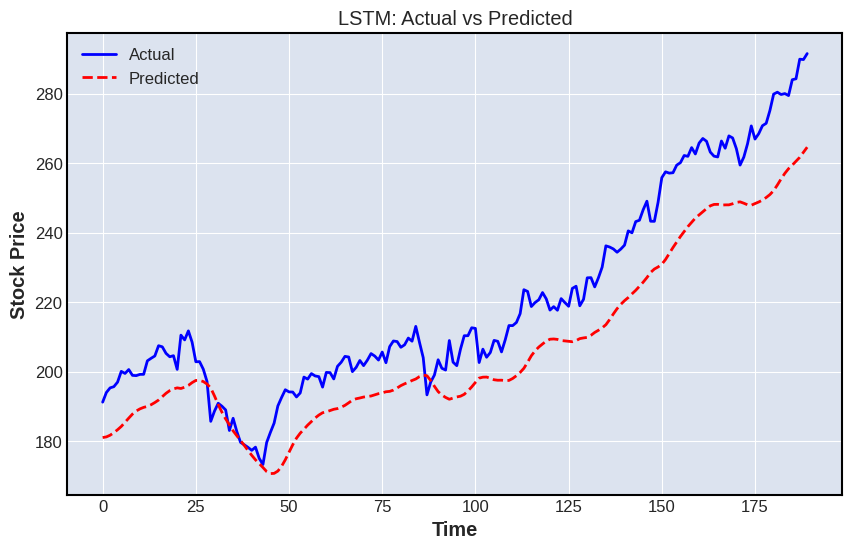

In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Sample data (replace with your actual dataset)
# Assuming 'data' is your DataFrame containing stock prices (with date as index)
# data = pd.read_csv("your_data.csv", parse_dates=True, index_col='Date')

# Step 1: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))

# Assuming 'Close' is the column you're predicting
scaled_data = scaler.fit_transform(data[['Close']].values)

# Step 2: Create a dataset with X (input features) and y (target values)
def create_dataset(data, time_step=12):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Last 'time_step' rows as features
        y.append(data[i, 0])  # Next value as the target
    return np.array(X), np.array(y)

# Split data into training, validation, and test sets
train_size = int(len(scaled_data) * 0.8)
valid_size = int(len(scaled_data) * 0.1)
test_size = len(scaled_data) - train_size - valid_size

train_data = scaled_data[:train_size]
valid_data = scaled_data[train_size:train_size+valid_size]
test_data = scaled_data[train_size+valid_size:]

# Step 3: Prepare dataset for training
X_train, y_train = create_dataset(train_data)
X_valid, y_valid = create_dataset(valid_data)
X_test, y_test = create_dataset(test_data)

# Reshape X to fit LSTM input shape (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 4: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid), verbose=2)

# Step 6: Evaluate the model on test data
y_pred = model.predict(X_test)

# Inverse transform to get the actual price predictions
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Evaluate the model on test set
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100
r2 = r2_score(y_test_actual, y_pred)
evs = explained_variance_score(y_test_actual, y_pred)

# Calculate Accuracy based on R² and MAPE
accuracy_r2 = r2 * 100  # R² as percentage
accuracy_mape = 100 - mape  # Accuracy based on MAPE

# Print evaluation metrics
print(f"Evaluation Metrics on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"R-squared (Accuracy): {accuracy_r2:.4f}%")
print(f"Explained Variance Score (EVS): {evs:.4f}")
print(f"Accuracy (R-squared based): {accuracy_r2:.4f}%")
print(f"Accuracy (MAPE based): {accuracy_mape:.4f}%")

# Step 8: Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red', linestyle='dashed')
plt.title('LSTM: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [65]:
import pickle

with open('Stock_Market.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Model saved successfully!")
    f.close()

Model saved successfully!


**Saved the Best Model using pickle**

In [66]:
with open('Stock_Market.pkl', 'wb') as f:
    pickle.dump(model, f)

    print("Best model saved as 'Stock_Market.pkl', 'wb'.")

Best model saved as 'Stock_Market.pkl', 'wb'.


**Load the Saved Model**

In [67]:
with open('Stock_Market.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

    print("Model loaded successfully!")

Model loaded successfully!
